In [34]:
from __future__ import print_function, division

from IPython.core.display import HTML, Image

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

PATH = '.'

# ![](https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png) DBSCAN 
Week 7 | Lesson 4.2

### LEARNING OBJECTIVES
*After this lesson, you will be able to:*
- Perform a DBSCAN
- Compare DBSCAN to other forms of clustering
- Understand how to interpret the results of their analysis

### LESSON GUIDE
| TIMING  | TYPE  | TOPIC  |
|:-:|---|---|
| 5 min  | [Opening](#opening)  | Opening  |
| 10 min  | [Introduction](#introduction)   | What is DBSCAN?  |
| 15 min  | [Demo](#demo)  | Implementation of DBSCAN |
| 25 min  | [Guided Practice](#guided-practice<a name="opening"></a>)  | Example of DBSCAN in PYTHON  |
| 25 min  | [Independent Practice](#ind-practice)  | Perform your own DBSCAN |
| 5 min  | [Conclusion](#conclusion)  | Conclusion  |

## Clustering Algorithms: What have we discussed?

## K-Means

[K-Means](http://shabal.in/visuals/kmeans/top.gif)

## Hierarchical Clustering

In [16]:
Image(url="http://i.makeagif.com/media/2-24-2014/DkJOLy.gif")

## How could these go wrong?

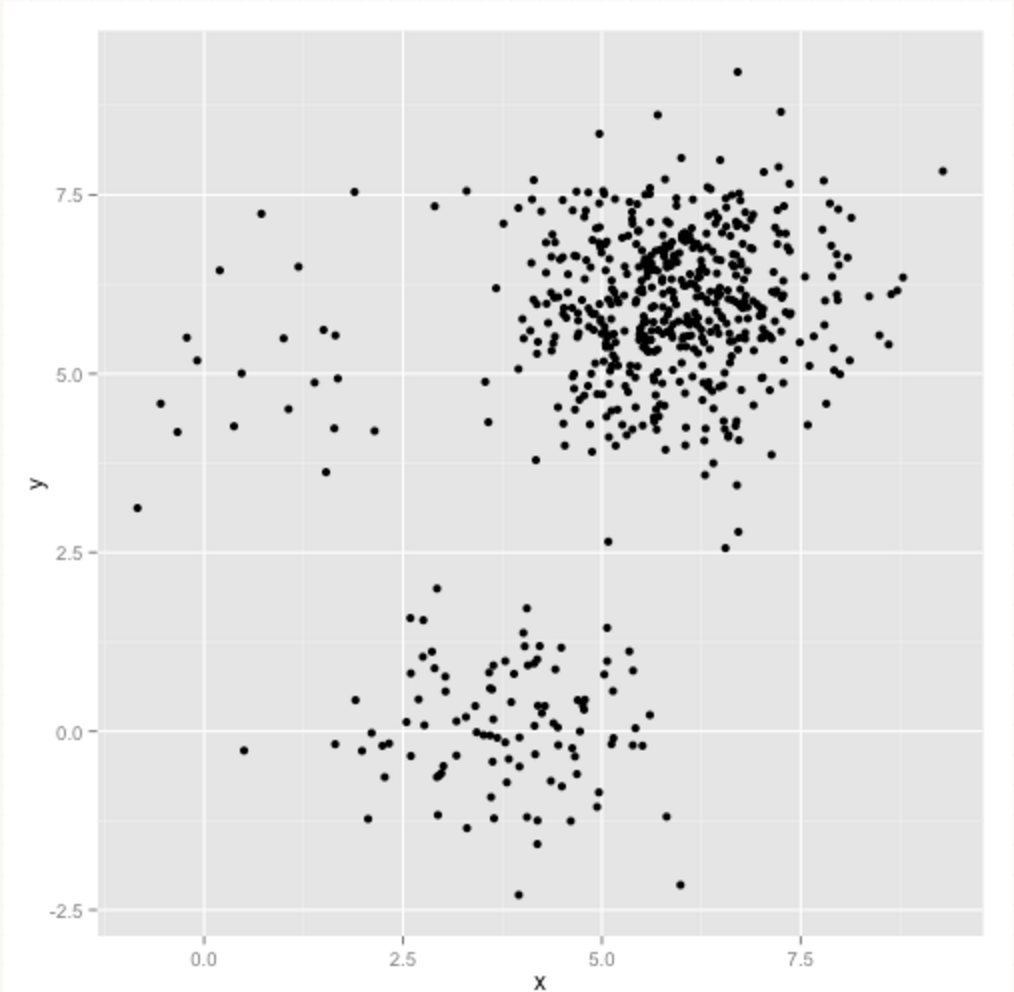

In [20]:
Image(PATH + '/assets/images/gaussian.png', width=500)

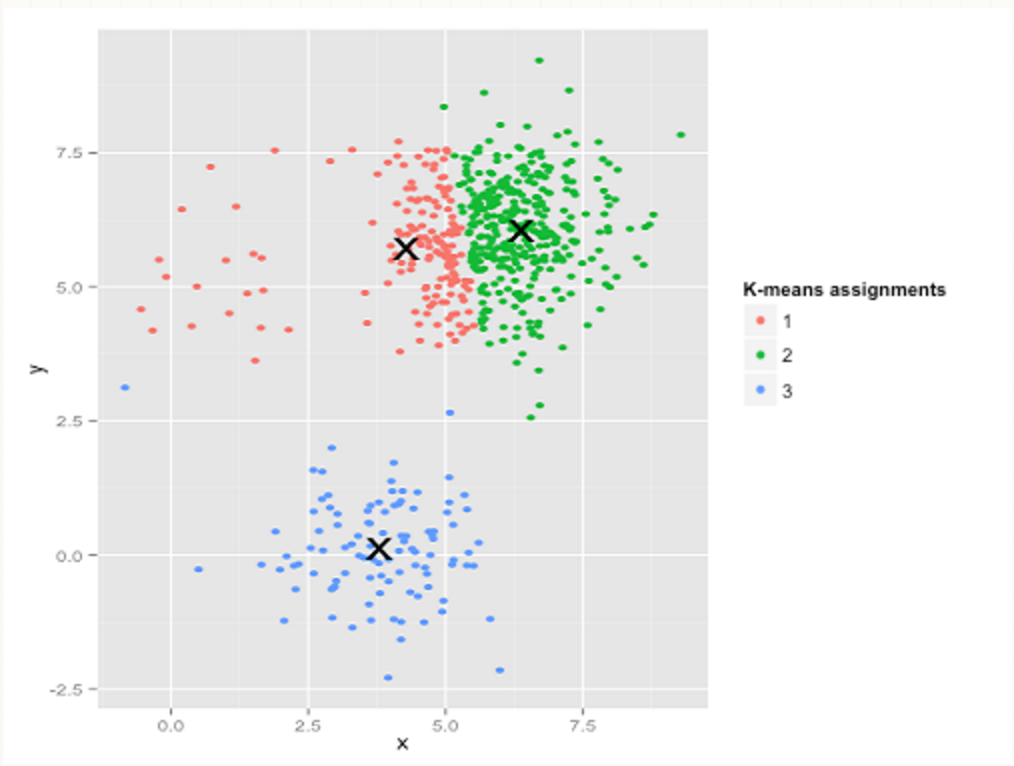

In [23]:
Image(PATH + '/assets/images/k-gone-wrong.png', width=700)

## Even on somewhat ideal clusters things can go wrong...

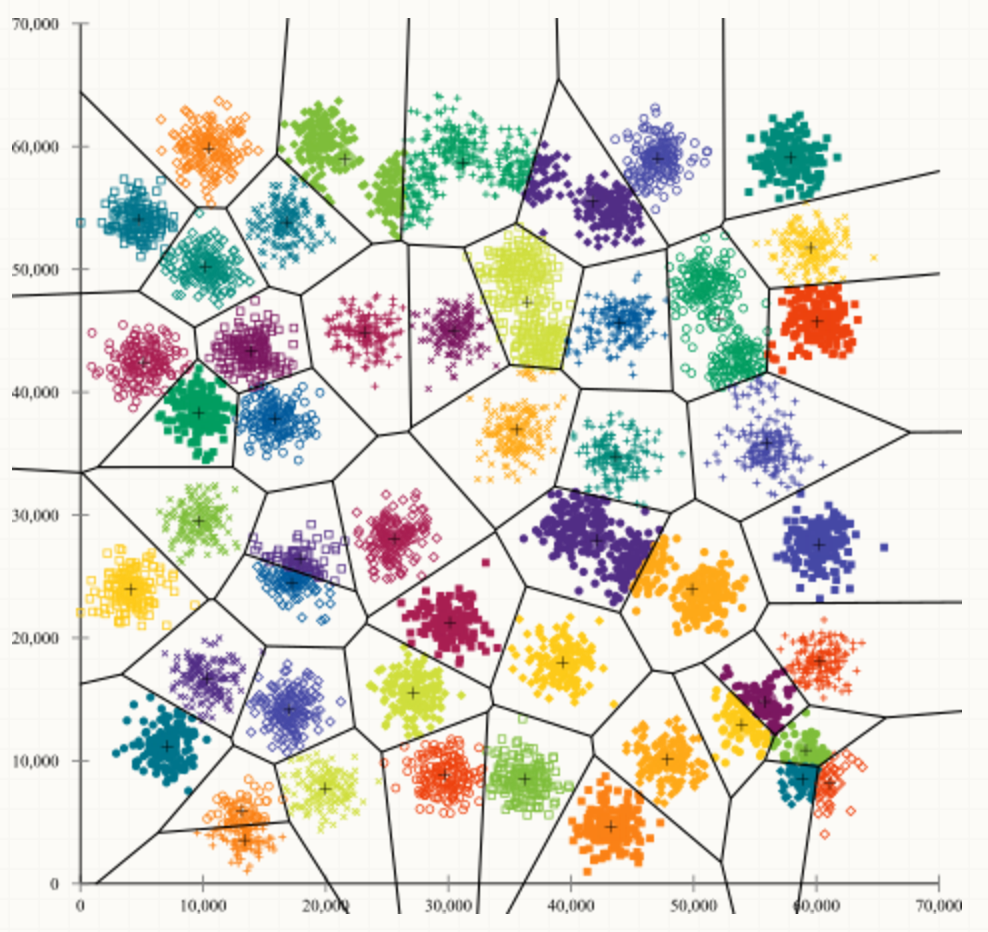

In [27]:
Image(PATH + '/assets/images/k-gone-wrong-2.png', width=500)

## Today We Introduce DBSCAN

## DB-WHA?

## Density-Based Spacial Clustering for Applications with Noise

## The first key 🔑 word here is density

In [30]:
Image(url='https://qzprod.files.wordpress.com/2016/01/screen-shot-2016-01-07-at-11-06-18-pm.png', width=500)

## Why Density?

## Because DBSCAN works by neighbor-based polling approach

## The second key 🔑 word is noise

## Noise because not every point is associated with a cluster

## Ok, so how does it work?

## Like K-means and HAC, there are some parameters to set

## The Parameters:

## Min Points - This is the minimum number of points required to form a cluster.

## Epsilon - This is the maximum spanning distance that a point can be from the polling point in order to be recruited to the cluster.

## The order of operations for DBSCAN

## Start with a single arbitrary starting point. This point's ε-neighborhood is retrieved, and if it contains sufficiently many points, a cluster is started. Otherwise, the point is labeled as noise. 

## If noise, select another random unvisted point, and begin again.

## If those points form a cluster, continue outward from each of the cluster points in the same manner until the point that no other points can be reached. At that point the cluster is closed and a new random point outside the cluster is selected and the process begins anew.

[DBSCAN Demo](http://www.naftaliharris.com/blog/visualizing-dbscan-clustering/)

## Implementing DBSCAN in Python

## Load our data

In [146]:
from sklearn.cluster import DBSCAN
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler

centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.3,
                            random_state=0)

## Plot our data

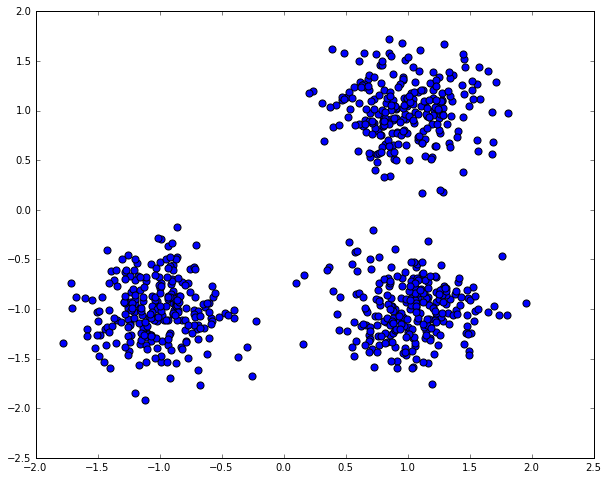

In [147]:
fig = plt.figure(figsize=(10,8))
plt.scatter(X[:,0], X[:,1], s=50)

## Instantiate DBSCAN class with min pts and eps

In [148]:
db = DBSCAN(eps=0.3, min_samples=10)

## Fit the model

In [149]:
X = StandardScaler().fit_transform(X)

db.fit(X)

DBSCAN(algorithm='auto', eps=0.3, leaf_size=30, metric='euclidean',
    min_samples=10, p=None, random_state=None)

## How do you know what good estimates of epsilon and min pts are?

As a general rule when choosing the minimum points - you should always aim to have the **minimum number of points be greater or equal to the amount of dimensions in your data, plus one**. This typically will give the algorithm a good estimation of how to evaluate the clusters. 

Calculating epsilon is a bit trickier and uses a method called the k-distance, which can help visualize the best epsilon. Today, we're going to estimate epsilon so that you can get an understanding of how varying values affect the results of the analysis.

The DBSCAN algorithm in Python returns two items - the core samples and the labels for each point. 

The core samples are the points which the algorithm found that had min pts (continued from there)
Those that are in the cluster but are not core points are border points.

In [150]:
core_samples = db.core_sample_indices_
labels = db.labels_

## Get our Silhouette Score

In [151]:
from sklearn.metrics import silhouette_score

print("Silhouette Coefficient: %0.3f"
      % silhouette_score(X, labels))

Silhouette Coefficient: 0.660


## Plot our clusters

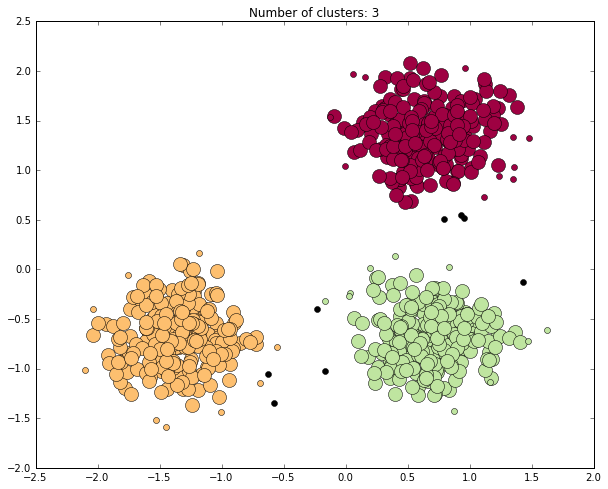

In [152]:
fig = plt.figure(figsize=(10,8))

core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=6)

plt.title('Number of clusters: %d' % n_clusters_)
plt.show()

## Independent Practice

Now that you've practiced one implementation of DBSCAN, we're going to be circling back to the FAA airport data from the previous lessons and perform a DBSCAN on it.

We want to look at the airport cancellations data, as a whole, and use DBSCAN to determine the clusters. Afterwards, we'll want to compare the results of the DBSCAN to those of a k-means to see the differentials in cluster assignments. As part of you're task, you'll have the experiment with various inputs of epsilon and minimum points for DBSCAN, as well as the value of "k" for k-means since this is a raw, dense dataset!

Although it may not always be apparent what the correct answer is - try your best with the knowledge that you have and the information given to you. If you get stuck, compare your solution with that of a classmate.

Where there any areas where you got stuck? What factors may have halted your analysis?

## Conclusion:

- DBSCAN works well for clustering in the way people tend to imagine clusters
- It takes two parameters: epsilon and min points
- Computationally it runs somewhere between k-means and HAC